In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *
import statistics

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy/cross')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate= 1e-3
wd=1e-4
num_folds = 5

#folds only include training data
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
#data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])

In [6]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv',classes=['Suicide','Homicide'])

In [7]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [8]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


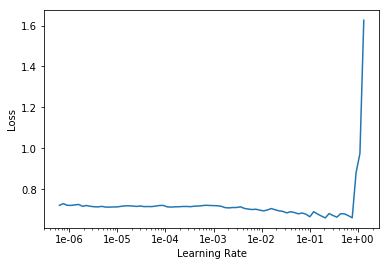

In [9]:
learn.recorder.plot()

In [10]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:04
epoch  train_loss  valid_loss  accuracy
1      0.599485    0.575711    0.737452  (00:01)
2      0.559217    0.491707    0.772201  (00:01)
3      0.517574    0.470591    0.806950  (00:01)
4      0.515060    0.449479    0.806950  (00:01)



In [11]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:49
epoch  train_loss  valid_loss  accuracy
1      0.558246    0.430724    0.818533  (00:02)
2      0.516406    0.366452    0.864865  (00:02)
3      0.444572    0.280469    0.888031  (00:02)
4      0.425761    0.247378    0.918919  (00:02)
5      0.380510    0.232277    0.899614  (00:02)
6      0.326677    0.201587    0.926641  (00:02)
7      0.364728    0.263293    0.872587  (00:02)
8      0.296453    0.216265    0.903475  (00:02)
9      0.271556    0.204082    0.930502  (00:02)
10     0.214775    0.257381    0.888031  (00:02)
11     0.233851    0.254204    0.907336  (00:02)
12     0.252000    0.197653    0.907336  (00:02)
13     0.321863    0.206551    0.903475  (00:02)
14     0.320656    0.218781    0.911197  (00:02)
15     0.216205    0.214172    0.911197  (00:02)
16     0.251790    0.221847    0.903475  (00:02)
17     0.247039    0.191569    0.918919  (00:02)
18     0.279380    0.210229    0.907336  (00:02)
19     0.203366    0.222408    0.918919  (00:02)
20     0.26

In [12]:
learn.validate()

[0.23766112, tensor(0.8842)]

In [13]:
accuracy_list.append(learn.validate()[1].item())

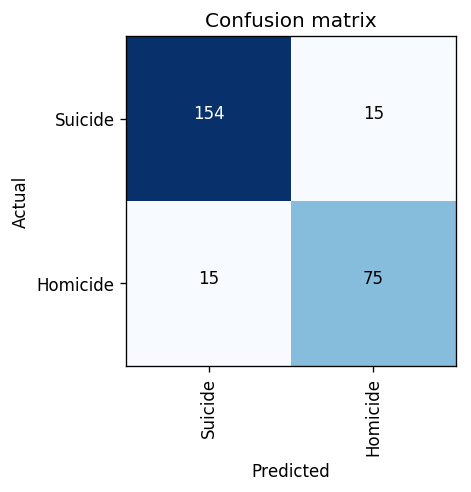

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

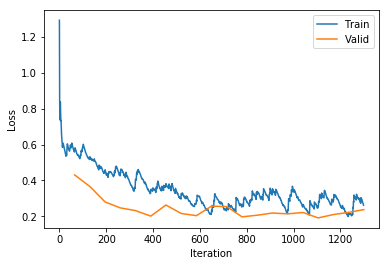

In [15]:
learn.recorder.plot_losses()

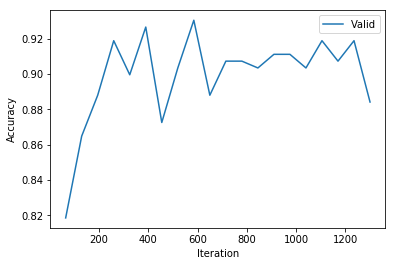

In [16]:
learn.recorder.plot_metrics()

In [17]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [18]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


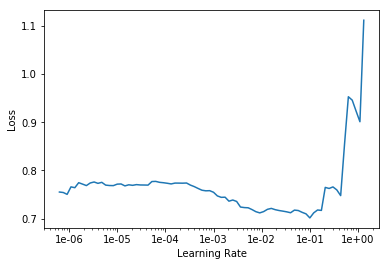

In [19]:
learn.recorder.plot()

In [20]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:04
epoch  train_loss  valid_loss  accuracy
1      0.685886    0.587730    0.722008  (00:01)
2      0.585005    0.512560    0.745174  (00:01)
3      0.509567    0.451972    0.822394  (00:01)
4      0.536728    0.480362    0.749035  (00:01)



In [21]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:49
epoch  train_loss  valid_loss  accuracy
1      0.527246    0.391136    0.845560  (00:02)
2      0.451694    0.299339    0.888031  (00:02)
3      0.431736    0.261608    0.907336  (00:02)
4      0.333280    0.214324    0.911197  (00:02)
5      0.374503    0.224594    0.899614  (00:02)
6      0.309202    0.222773    0.911197  (00:02)
7      0.272467    0.190160    0.915058  (00:02)
8      0.304272    0.220264    0.891892  (00:02)
9      0.307838    0.248272    0.903475  (00:02)
10     0.251251    0.244816    0.903475  (00:02)
11     0.320998    0.215637    0.911197  (00:02)
12     0.257346    0.232522    0.903475  (00:02)
13     0.212841    0.199202    0.911197  (00:02)
14     0.251323    0.240740    0.907336  (00:02)
15     0.240347    0.228911    0.895753  (00:02)
16     0.149645    0.236456    0.888031  (00:02)
17     0.176451    0.247757    0.903475  (00:02)
18     0.279163    0.260015    0.891892  (00:02)
19     0.230456    0.201383    0.907336  (00:02)
20     0.23

In [22]:
learn.validate()

[0.22630616, tensor(0.8958)]

In [23]:
accuracy_list.append(learn.validate()[1].item())

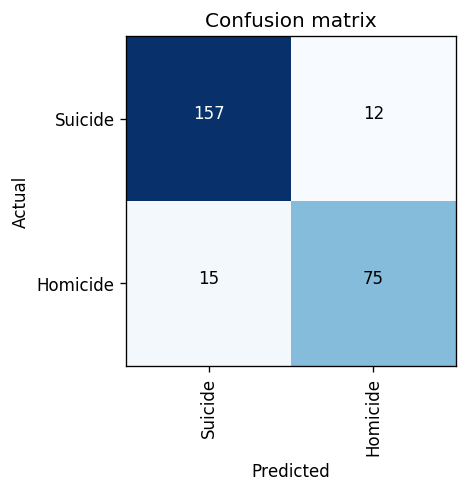

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

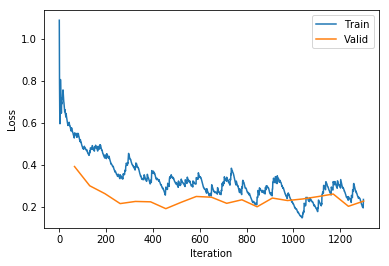

In [25]:
learn.recorder.plot_losses()

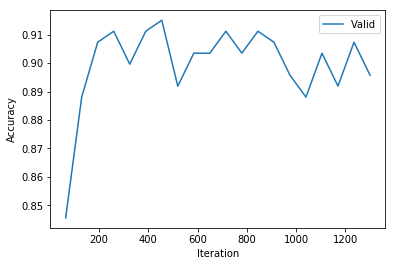

In [26]:
learn.recorder.plot_metrics()

In [27]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [28]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


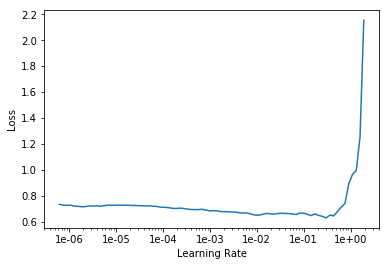

In [29]:
learn.recorder.plot()

In [30]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:04
epoch  train_loss  valid_loss  accuracy
1      0.620117    0.540483    0.799228  (00:01)
2      0.583495    0.449837    0.783784  (00:01)
3      0.576856    0.488757    0.783784  (00:01)
4      0.520998    0.422056    0.779923  (00:01)



In [31]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 01:02
epoch  train_loss  valid_loss  accuracy
1      0.487175    0.342625    0.864865  (00:02)
2      0.448079    0.290901    0.891892  (00:02)
3      0.376811    0.275966    0.872587  (00:03)
4      0.379018    0.234856    0.895753  (00:03)
5      0.370384    0.254834    0.899614  (00:03)
6      0.360775    0.306280    0.876448  (00:03)
7      0.310046    0.202573    0.915058  (00:03)
8      0.332598    0.228589    0.895753  (00:02)
9      0.308436    0.186044    0.918919  (00:03)
10     0.256673    0.211589    0.907336  (00:03)
11     0.313285    0.221371    0.891892  (00:03)
12     0.271315    0.220721    0.888031  (00:03)
13     0.239102    0.198762    0.922780  (00:03)
14     0.199433    0.221544    0.915058  (00:03)
15     0.189561    0.190293    0.899614  (00:03)
16     0.255014    0.201885    0.918919  (00:03)
17     0.281825    0.224358    0.895753  (00:02)
18     0.210951    0.196507    0.918919  (00:03)
19     0.188353    0.197494    0.930502  (00:03)
20     0.26

In [32]:
learn.validate()

[0.20699582, tensor(0.9266)]

In [33]:
accuracy_list.append(learn.validate()[1].item())

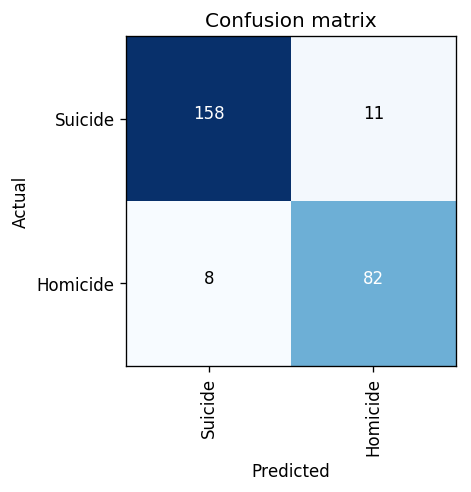

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

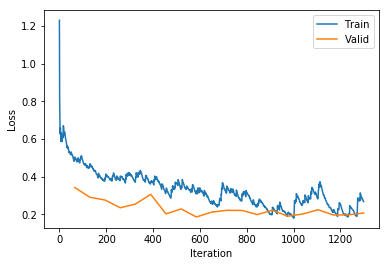

In [35]:
learn.recorder.plot_losses()

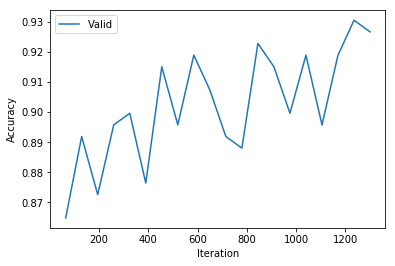

In [36]:
learn.recorder.plot_metrics()

In [37]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [38]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


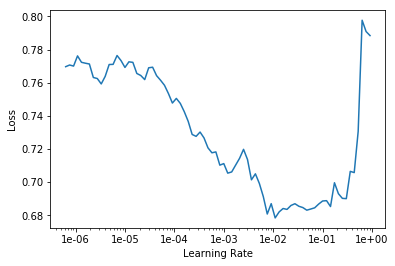

In [39]:
learn.recorder.plot()

In [40]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:06
epoch  train_loss  valid_loss  accuracy
1      0.695208    0.609102    0.694981  (00:01)
2      0.615365    0.487847    0.779923  (00:01)
3      0.565005    0.498298    0.756757  (00:01)
4      0.504810    0.513069    0.733591  (00:01)



In [41]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 01:05
epoch  train_loss  valid_loss  accuracy
1      0.597631    0.500211    0.702703  (00:02)
2      0.471861    0.317369    0.880309  (00:03)
3      0.488319    0.339690    0.899614  (00:02)
4      0.448820    0.309722    0.876448  (00:03)
5      0.438403    0.253228    0.891892  (00:02)
6      0.332442    0.218339    0.918919  (00:03)
7      0.338918    0.200483    0.915058  (00:03)
8      0.359817    0.234420    0.911197  (00:02)
9      0.285509    0.218652    0.903475  (00:03)
10     0.268732    0.222587    0.918919  (00:03)
11     0.225916    0.222583    0.899614  (00:03)
12     0.253624    0.216419    0.891892  (00:03)
13     0.227848    0.261368    0.922780  (00:03)
14     0.184808    0.209935    0.899614  (00:03)
15     0.264063    0.240173    0.915058  (00:03)
16     0.224574    0.196262    0.911197  (00:03)
17     0.252230    0.214899    0.891892  (00:03)
18     0.198127    0.212466    0.899614  (00:03)
19     0.196094    0.232436    0.907336  (00:03)
20     0.21

In [42]:
learn.validate()

[0.23370309, tensor(0.9112)]

In [43]:
accuracy_list.append(learn.validate()[1].item())

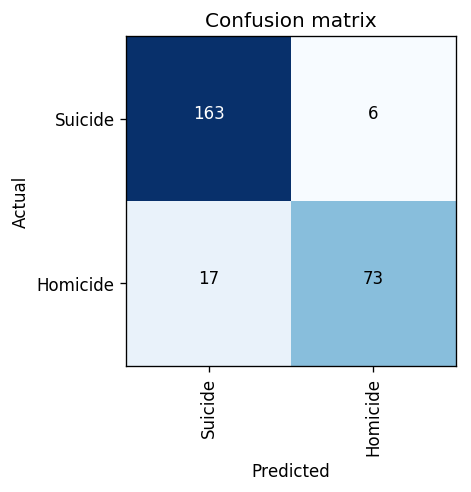

In [44]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

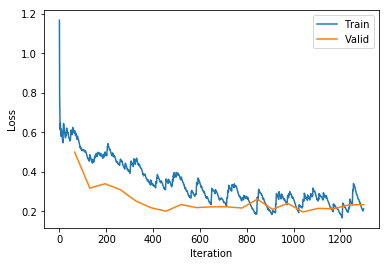

In [45]:
learn.recorder.plot_losses()

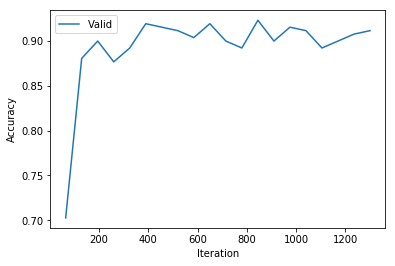

In [46]:
learn.recorder.plot_metrics()

In [47]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [48]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


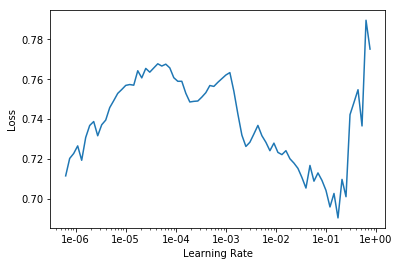

In [49]:
learn.recorder.plot()

In [50]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:04
epoch  train_loss  valid_loss  accuracy
1      0.634161    0.577627    0.714286  (00:01)
2      0.561974    0.467585    0.768340  (00:01)
3      0.544228    0.403330    0.826255  (00:01)
4      0.504562    0.434500    0.795367  (00:01)



In [51]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 01:06
epoch  train_loss  valid_loss  accuracy
1      0.530222    0.428517    0.818533  (00:02)
2      0.462318    0.325874    0.837838  (00:03)
3      0.428571    0.300926    0.880309  (00:03)
4      0.439872    0.319042    0.888031  (00:02)
5      0.378625    0.258125    0.899614  (00:03)
6      0.373267    0.235771    0.891892  (00:02)
7      0.336458    0.267256    0.888031  (00:03)
8      0.324940    0.207334    0.911197  (00:02)
9      0.223507    0.238862    0.895753  (00:03)
10     0.238379    0.257364    0.888031  (00:03)
11     0.215287    0.216425    0.903475  (00:03)
12     0.248017    0.221390    0.915058  (00:03)
13     0.208470    0.198268    0.915058  (00:03)
14     0.180619    0.216931    0.907336  (00:03)
15     0.310174    0.244077    0.888031  (00:02)
16     0.254196    0.203155    0.922780  (00:03)
17     0.203499    0.272581    0.915058  (00:03)
18     0.172421    0.247698    0.915058  (00:03)
19     0.199908    0.230325    0.903475  (00:03)
20     0.17

In [52]:
learn.validate()

[0.26267105, tensor(0.8996)]

In [53]:
accuracy_list.append(learn.validate()[1].item())

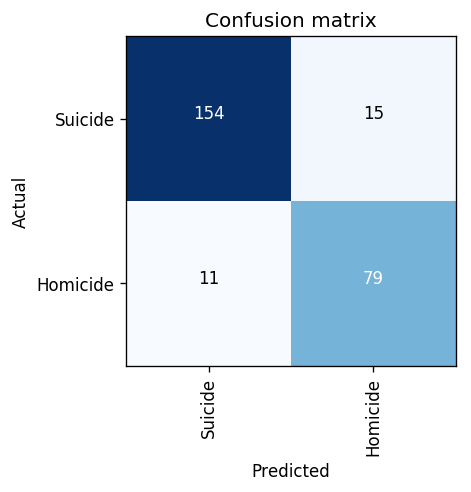

In [54]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

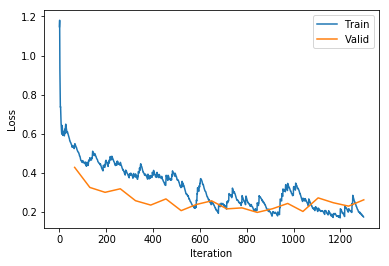

In [55]:
learn.recorder.plot_losses()

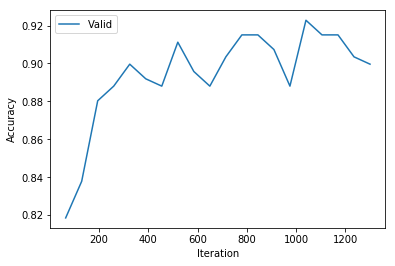

In [56]:
learn.recorder.plot_metrics()

In [57]:
print(accuracy_list)

[0.88416987657547, 0.8957529067993164, 0.9266409277915955, 0.9111968874931335, 0.8996139168739319]


In [58]:
print(sum(accuracy_list)/len(accuracy_list))

0.9034749031066894


In [59]:
print(statistics.variance(accuracy_list))

0.00026087855839946884


In [60]:
import torch

torch.cuda.empty_cache()